In [1]:
%pip install tensorflow numpy matplotlib pandas scikit-learn seaborn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import matplotlib.pyplot as plt
from keras import Model, Input, layers, losses, activations
from sklearn.model_selection import train_test_split

In [208]:
import json
import glob

hr_data = []

for json_file in glob.glob('rawhr/*.json'):

    with open(json_file, 'r') as file:
        data = json.load(file)
    
        hr = list(map(lambda x: x[1], data['heartRateValues']))

        if len(hr) != 720:
            print(json_file.name )
        hr_data.append(hr)

hr_data = hr_data + hr_data + hr_data +  hr_data + hr_data + hr_data
hr_data = hr_data + hr_data + hr_data +  hr_data + hr_data + hr_data
hr_data = hr_data + hr_data + hr_data +  hr_data + hr_data + hr_data
hr_data = np.array(hr_data)
print(hr_data.shape)

(4752, 720)


In [200]:
def plot_hr(data):
    plt.figure(figsize=(18, 4))
    plt.plot(data)
    plt.ylim(0,200)
    plt.show()

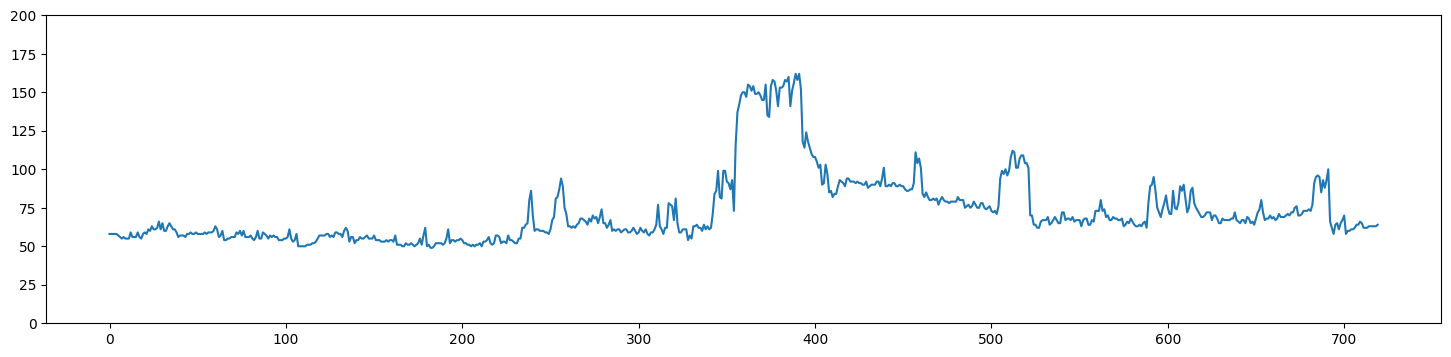

In [28]:
plot_hr(hr_data[2])

In [ ]:
x_train = hr_data.astype('float32') / 250.0

x_train_normal, x_val_normal  = train_test_split(x_train, test_size=0.25, random_state=42)

print(x_train.shape, x_train_normal.shape, x_val_normal.shape)

(4752, 720) (3564, 720) (1188, 720)


In [202]:
Dense = layers.Dense

def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Dense(720,"leaky_relu")(input_img)
    x = Dense(360,"leaky_relu" )(x)
    x = Dense(120,"leaky_relu")(x)
    x = Dense(12,"leaky_relu")(x)
    x = Dense(120,"leaky_relu")(x)

    # Decoder
    x = Dense(360,"leaky_relu")(x)
    x = Dense(720,"leaky_relu")(x)
    
    autoencoder = Model(input_img, x)
    return autoencoder

In [203]:
# Build the autoencoder model
input_shape = (720,)
autoencoder = build_autoencoder(input_shape)
autoencoder.summary()

# Compile the model
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 720)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 720)            │       519,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 360)            │       259,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 120)            │        43,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 12)             │         1,452 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 120)            │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 360)            │        43,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 720)            │       259,920 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,128,492 (4.30 MB)

 Trainable params: 1,128,492 (4.30 MB)

 Non-trainable params: 0 (0.00 B)

In [204]:
# Train the autoencoder on the training data
history = autoencoder.fit(x_train_normal, x_train_normal,
                          epochs=20,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(x_val_normal, x_val_normal))

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - val_loss: 0.0024
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.8642e-04 - val_loss: 7.4926e-04
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.1230e-04 - val_loss: 5.3481e-04
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2604e-04 - val_loss: 2.8409e-04
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3624e-04 - val_loss: 1.3338e-04
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0706e-04 - val_loss: 8.2384e-05
Epoch 9/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.7966e-05 - val_loss: 4.3132e-04
Epoch 10/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.2222e-04 - val_loss: 6.2328e-06
Epoch 11/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4969e-06 - val_loss:

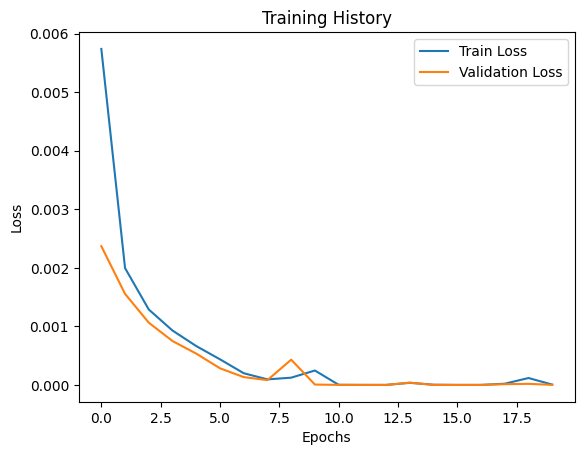

In [205]:
# Plot the training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [206]:
# Calculate MSE for the validation dataset
x_out_val = autoencoder.predict(x_val_normal)
mse_val = np.mean(np.square(x_val_normal - x_out_val))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(1188, 720)
(1188, 720)


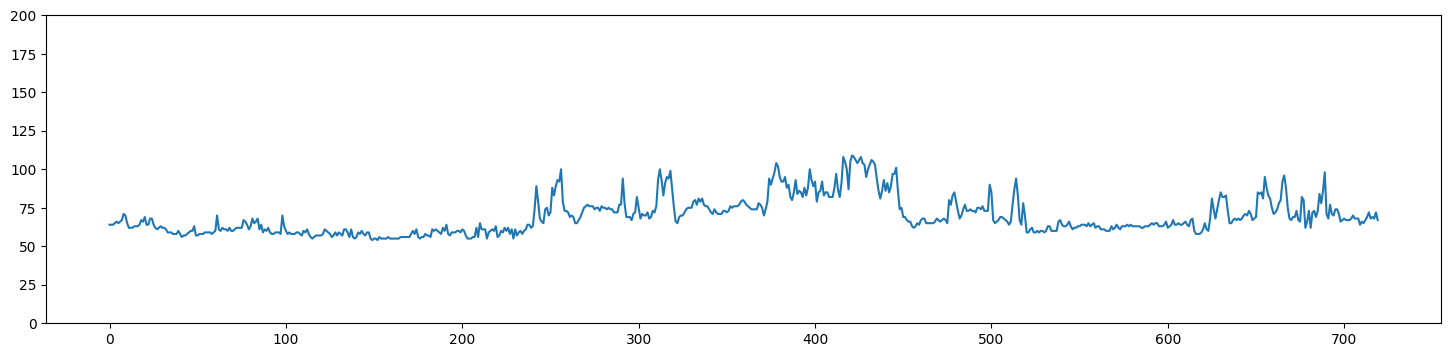

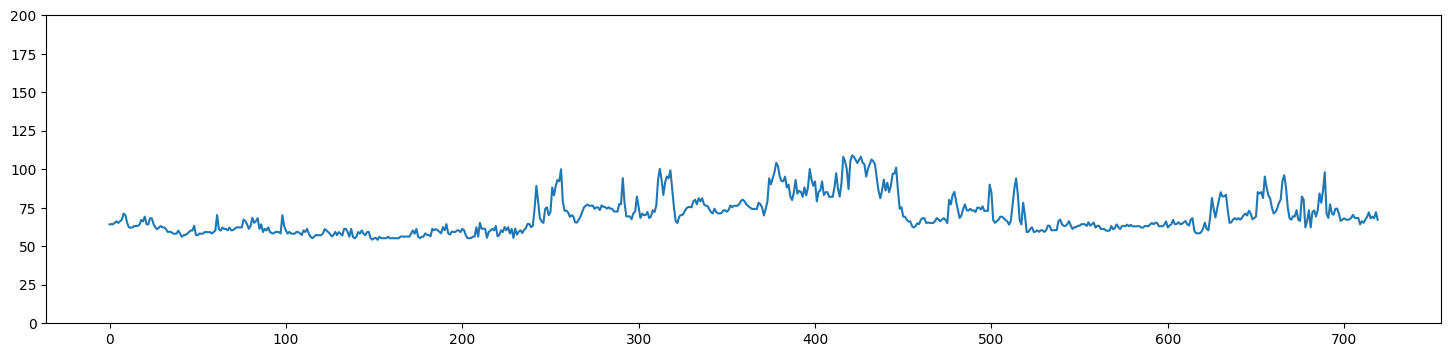

In [207]:

print(x_val_normal.shape)
print(x_out_val.shape)

plot_hr(x_val_normal[1].flatten()*250)
plot_hr(x_out_val[1].flatten()*250)